In [1]:
%cd ../../

/mnt/sda/otani/Experiments/eval-detection


In [2]:
import neptune.new as neptune
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import numpy as np
import json
import os
%matplotlib inline

In [3]:
run = neptune.init(project=os.environ["NEPTUNE_PROJECT"], run="EV-116", mode="read-only")
measures = {}
for model_name in ["DETR", "Faster-RCNN", "VFNet", "RetinaNet", "YOLOF"]:
    run["measures/"+model_name].download("tmp/")
    data = json.load(open("tmp/"+model_name+".json"))
    measures[model_name] = data
run.stop()

https://app.neptune.ai/mayu-ot/eval-detection/e/EV-116
Remember to stop your run once you’ve finished logging your metadata (https://docs.neptune.ai/api-reference/run#stop). It will be stopped automatically only when the notebook kernel/interactive console is terminated.
Shutting down background jobs, please wait a moment...
Done!


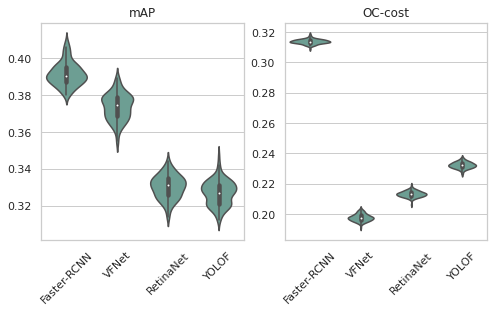

In [4]:
sns.set_theme(style="whitegrid")
data_frame = {measure: [] for measure in ["bbox_mAP", "mOTC"]}
data_frame["model"] = []
for k, data in measures.items():
    if k == "DETR":
        continue
    data_frame["model"] += [k] * len(data)
    for m in ["bbox_mAP", "mOTC"]:
        data_frame[m] += [x[m] for x in data]

cp = sns.cubehelix_palette(rot=-.4)
f, axes = plt.subplots(1, 2, figsize=(4*2, 4))
for ax, m in zip(axes, ["bbox_mAP", "mOTC"]):
    sns.violinplot(x="model", y=m, ax=ax, data=data_frame, color=cp[2])
    if m == "mOTC":
        m = "OC-cost"
    if m == "bbox_mAP":
        m = "mAP"
    ax.set_title(m)
    ax.set_xlabel("")
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
plt.savefig("outputs/figs/variance.pdf", bbox_inches="tight")


In [18]:
sns.cubehelix_palette(rot=-.4)

[[0.7788013041060939, 0.8977179643101579, 0.7971480974663592],
 [0.5688299932818057, 0.7878960136975732, 0.6754191211563135],
 [0.39340270878404693, 0.6526282668058052, 0.5959617419736206],
 [0.2699414955609766, 0.4965778688514405, 0.5219003947563425],
 [0.18318359421158437, 0.32201177575137396, 0.41140014301575434],
 [0.10892122810595439, 0.15204350513797243, 0.24215989137836502]]